The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc. So, for this problem we will be using both K-Means and Hierarchical Clustering algorithms.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
dataset = pd.read_csv(r"D:\Hem D\My projects data\Wholesale customers data.csv")
    

In [3]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

# Standardizing Dataset

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset)


In [6]:
data = round(pd.DataFrame(df_scaled),3).describe()
data

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,4.400000e+02,440.000000,440.000000,440.000000
mean,0.000314,0.000334,0.000014,0.000005,5.046468e-19,-0.000005,-0.000009,-0.000011
std,1.001162,1.001134,1.001141,1.001136,1.001151e+00,1.001153,1.001153,1.001108
min,-0.690000,-1.995000,-0.950000,-0.779000,-8.370000e-01,-0.628000,-0.604000,-0.540000
25%,-0.690000,-0.702000,-0.702500,-0.578250,-6.110000e-01,-0.480500,-0.551000,-0.396250
50%,-0.690000,0.591000,-0.276500,-0.294000,-3.370000e-01,-0.319000,-0.433500,-0.198500
75%,1.449000,0.591000,0.390250,0.189000,2.850000e-01,0.099250,0.218750,0.104500
max,1.449000,0.591000,7.928000,9.184000,8.937000e+00,11.919000,7.968000,16.478000


# So, lets solve this problem by K-means Clustering 

### 1. Using  Elbow Method to find the optimum number of clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
## plotting elbow method graph
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 200, n_init= 15, n_jobs= -1, random_state=0 )
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

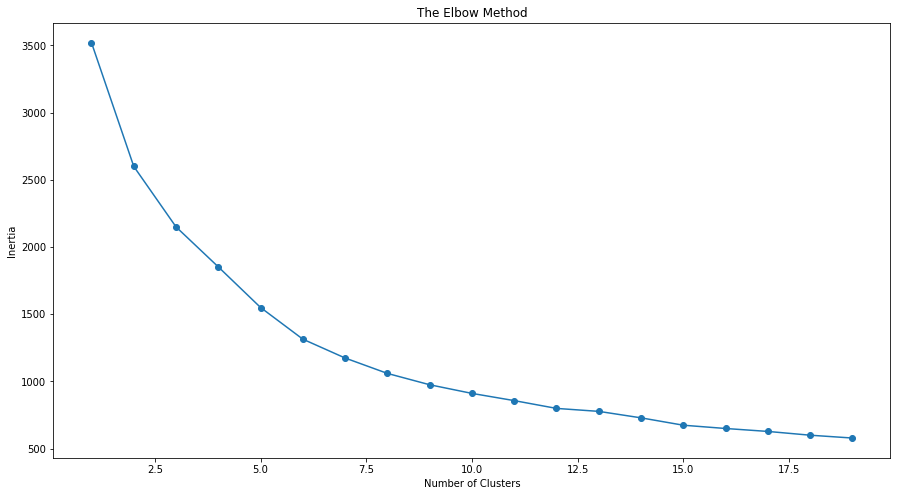

In [9]:
plt.figure(figsize= (15,8))
plt.plot(range(1,20), wcss, marker = 'o')
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 5 and fit the model:

### Applying K-means to the dataset (K = 5)

In [10]:
kmeans = KMeans(n_clusters= 5, init= 'k-means++', max_iter= 200, n_init=15, n_jobs= -1, random_state= 0)
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 4, 1, 1, 0, 0, 1, 1, 0, 0, 4, 1, 0, 0, 1, 4, 1, 1, 0, 4,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 4, 4, 0,
       0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1,

In [11]:
frame = pd.DataFrame(df_scaled)
frame['Category'] = y_kmeans
frame['Category'].value_counts()


0    211
1    125
2     91
4     11
3      2
Name: Category, dtype: int64

So, there are 211 data points belonging to cluster 1 (index 0), then 125 points in cluster 2 (index 1), and so on. This is how we can implement K-Means Clustering in Python.

# Now, Lets solve this problem by Hierarchical Clustering 

### Using Dendrogram to find optimal number of clusters

In [12]:
## for creating dendrogram, we have to use scipy library

import scipy.cluster.hierarchy as sch


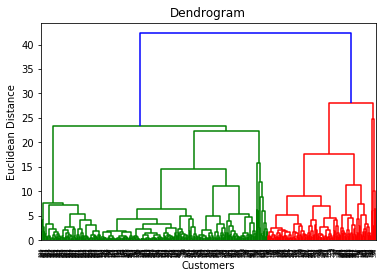

In [13]:
%matplotlib inline
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()


Now, finding the optimal number of clusters by looking the largest vertical distance without crossing any horizontal line. K = 5

### Fitting Hierarchical Clustering to the dataset

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 5, affinity= 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(df_scaled)
y_hc

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4,
       2, 4, 2, 4, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 2, 4, 2,

In [15]:
frame = pd.DataFrame(df_scaled)
frame['Category_HC'] = y_hc
frame['Category_HC'].value_counts()


0    220
2    136
4     78
1      5
3      1
Name: Category_HC, dtype: int64

Here, we find  there are 220 data points belonging to cluster 1 (index 0), then 136 points in cluster 2 (index 1), and so on. This is how we can implement Hierarchical Clustering in Python.